# Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/BDM Capstone/combined_files.csv'
df = pd.read_csv(file_path)
df.head()

In [ ]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col, axis=1, inplace=True)
df.head()

# Metadata

##Number of Days

In [ ]:
dates = df["BillDate"].unique()
print(f"Number of days : {len(dates)}")

Number of days : 348


## Stores Managed

In [ ]:
stores = df["StoreName"].unique()
print(f"Stores managed : {stores}")

Stores managed : ['Infinity Technologies - Bazaar Marg'
 'Infinity Technologies_Shankar Road'
 'Infinity Technologies_Bungalow Road' 'Infinity Technologies']


In [ ]:
products = df["ProductName"].unique()
print(f"Number of products : {len(products)}")

Number of products : 375


In [ ]:
New_Customers = (df["New customer Type"] == "NEW").sum()
Existing_Customers = (df["New customer Type"] == "EXISTING").sum()
print(f"New Customer incoming rate : {(New_Customers/(Existing_Customers + New_Customers))*100:.2f}%")
print(f"Existing Customer return rate : {(Existing_Customers/(Existing_Customers + New_Customers))*100:.2f}%")
print(f"New vs Existing customers ratio : {100*(New_Customers/Existing_Customers):.2f}%")

New Customer incoming rate : 30.02%
Existing Customer return rate : 69.98%
New vs Existing customers ratio : 42.91%


In [ ]:
import numpy as np
net_profit = np.sum(df["Amount"] - df["GrossWithDiscount"])
print(f"{net_profit:.3f}")

23591728.431


In [ ]:
df.dtypes

,0
StoreName,object
AlternateStoreCode,object
RefPromoCode,float64
BillDate,object
BillTime,object
MRP,float64
ProductLevelDisc%,float64
BillNumber,object
ProductLevelDiscAmount,float64
CustomerCode,int64


#Descriptive Statistics

##Averages

In [ ]:
import numpy as np
MRP_mean = np.mean(df["MRP"])
print(f"MRP mean : {MRP_mean:.2f}")
Total_profit=0
Total_Bills=0
Max_profit = 0
for i in df["BillNumber"].unique():
  Total_profit += df[df["BillNumber"] == i]["Profit"].sum()
  Total_Bills += 1
  if df[df["BillNumber"] == i]["Profit"].sum() > Max_profit:
    Max_profit = df[df["BillNumber"] == i]["Profit"].sum()
print(f"Profit mean : {(Total_profit/Total_Bills):.2f}")
print(f"Profit max : {(Max_profit):.2f}")

MRP mean : 31043.88
Profit mean : 11550.64
Profit max : 262712.00


###MRP

In [ ]:
# Calculate Q1 and Q3
Q1 = df["MRP"].quantile(0.25)
Q3 = df["MRP"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers = df[(df["MRP"] < lower_bound) | (df["MRP"] > upper_bound)]
num_outliers = len(outliers)
total_data_points = len(df)

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / total_data_points) * 100

# Filter data to remove outliers
filtered_data = df[(df["MRP"] >= lower_bound) & (df["MRP"] <= upper_bound)]

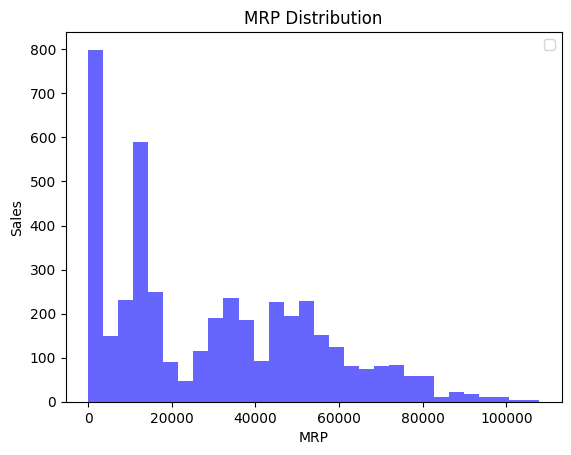

Percentage of Outliers: 1.30%
[1.00000000e+00 3.59562800e+03 7.19025600e+03 1.07848840e+04
 1.43795120e+04 1.79741400e+04 2.15687680e+04 2.51633960e+04
 2.87580240e+04 3.23526520e+04 3.59472800e+04 3.95419080e+04
 4.31365360e+04 4.67311640e+04 5.03257920e+04 5.39204200e+04
 5.75150480e+04 6.11096760e+04 6.47043040e+04 6.82989320e+04
 7.18935600e+04 7.54881880e+04 7.90828160e+04 8.26774440e+04
 8.62720720e+04 8.98667000e+04 9.34613280e+04 9.70559560e+04
 1.00650584e+05 1.04245212e+05 1.07839840e+05]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Calculate histogram data
counts, bin_edges = np.histogram(filtered_data["MRP"], bins=30)

# Plot histogram of data without outliers
plt.hist(filtered_data["MRP"], bins=30, color='blue', alpha=0.6)

plt.xlabel("MRP")
plt.ylabel("Sales")
plt.title("MRP Distribution")
plt.legend()
plt.show()

# Print the percentage of outliers
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")
print(bin_edges)

In [ ]:
bin_midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate correlation coefficient between MRP (bin_midpoints) and counts
correlation = np.corrcoef(bin_midpoints, counts)[0, 1]

# Print the correlation coefficient
print(f"Correlation Coefficient between MRP and Counts: {correlation:.2f}")


Correlation Coefficient between MRP and Counts: -0.68


In [ ]:
df[df["MRP"]<=3595.628]["ProductGroup"].unique()

array(['Consumer Notebooks Branded Options', 'G0', 'HP 1N SF Series',
       'CISS Ink Supplies', 'AiO - DeskJet', 'Retail Notebooks',
       'CTSS Canon Supplies', 'Smart watch', 'Finish Goods', nan, '.',
       'HyperX Accessories'], dtype=object)

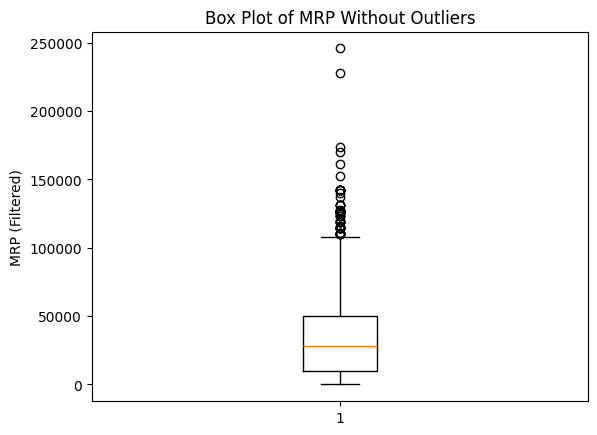

In [ ]:
plt.boxplot(df["MRP"])
plt.ylabel("MRP (Filtered)")
plt.title("Box Plot of MRP Without Outliers")
plt.show()

###Profit

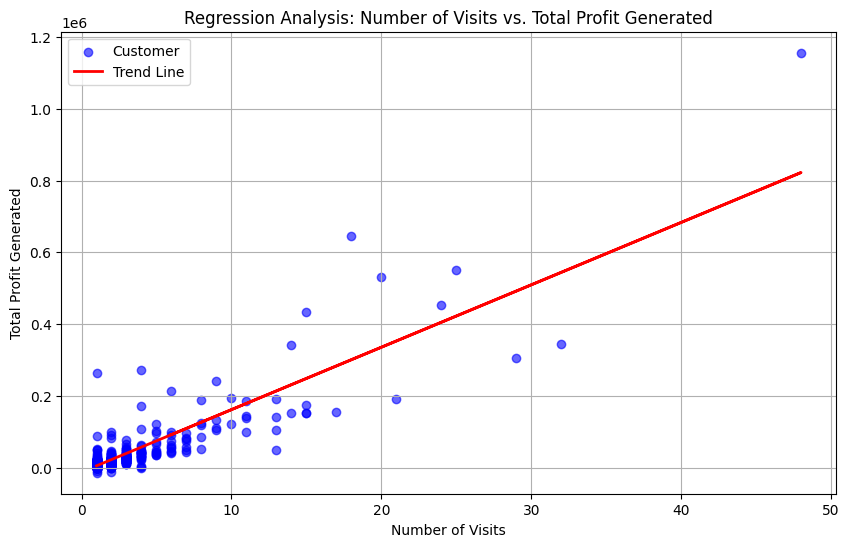

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Calculate the frequency of visits for each customer
visit_frequency = df.groupby("CustomerCode")["BillNumber"].nunique().reset_index()
visit_frequency.columns = ['CustomerCode', 'FrequencyOfVisits']

# Step 2: Aggregate profit for each customer
profit_data = df.groupby('CustomerCode').agg(
    TotalProfit=('Profit', 'sum')
).reset_index()

# Step 3: Merge the dataframes to combine visit frequency and total profit
combined_data = pd.merge(visit_frequency, profit_data, on='CustomerCode')

# Step 4: Prepare data for regression analysis
X = combined_data[['FrequencyOfVisits']]  # Independent variable (frequency of visits)
y = combined_data['TotalProfit']  # Dependent variable (total profit)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Step 5: Create scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(combined_data['FrequencyOfVisits'], combined_data['TotalProfit'], color='blue', alpha=0.6, label='Customer')
plt.plot(combined_data['FrequencyOfVisits'], y_pred, color='red', linewidth=2, label='Trend Line')

# Adding labels and title
plt.xlabel("Number of Visits")
plt.ylabel("Total Profit Generated")
plt.title("Regression Analysis: Number of Visits vs. Total Profit Generated")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Get the count of each FrequencyOfVisits value, sorted by the frequency
visit_counts = combined_data['FrequencyOfVisits'].value_counts().sort_index()

# Calculate the percentage for each FrequencyOfVisits
visit_percentage = ((visit_counts / len(combined_data)) * 100)

# Combine counts and percentages into a single DataFrame
visit_stats = pd.DataFrame({
    'Count': visit_counts,
    'Percentage': visit_percentage
})

# Display the DataFrame
print(visit_stats)

                   Count  Percentage
FrequencyOfVisits                   
1                    676   67.130089
2                    171   16.981132
3                     69    6.852036
4                     28    2.780536
5                     12    1.191658
6                     10    0.993049
7                      7    0.695134
8                      5    0.496524
9                      4    0.397219
10                     2    0.198610
11                     4    0.397219
13                     4    0.397219
14                     2    0.198610
15                     4    0.397219
17                     1    0.099305
18                     1    0.099305
20                     1    0.099305
21                     1    0.099305
24                     1    0.099305
25                     1    0.099305
29                     1    0.099305
32                     1    0.099305
48                     1    0.099305


In [ ]:
df[df["CustomerCode"].isin(combined_data[combined_data["FrequencyOfVisits"]==32]["CustomerCode"])]["CustomerName"].unique()

array(['SRI VISHNU SHARMA', 'BEST STUDY POINT'], dtype=object)

In [ ]:
# Remove duplicates based on BillNumber, keeping only the first occurrence of each BillNumber
unique_bills_df = df.drop_duplicates(subset="BillNumber")

# Now count the occurrences of 'New customer Type' for these unique BillNumbers
customer_type_counts = unique_bills_df["New customer Type"].value_counts()

# Display the result
print(customer_type_counts)


New customer Type
EXISTING    1283
NEW          730
Name: count, dtype: int64


In [ ]:
df[df["CustomerCode"].isin(combined_data[combined_data["TotalProfit"] <=0]["CustomerCode"])][["CustomerName","BillDate","BillNumber","Profit","ProductName"]]

In [ ]:
df[df["CustomerCode"] == 1119801][["BillDate", "Profit"]]

,BillDate,Profit
323,28/01/2023,13271.18
324,28/01/2023,13271.18
325,28/01/2023,13271.18
326,28/01/2023,13271.18
327,28/01/2023,13271.18
328,28/01/2023,13271.18
329,28/01/2023,-931.36
378,30/01/2023,-13271.18
379,30/01/2023,-13271.18
380,30/01/2023,-13271.18


In [ ]:
import pandas as pd

# Step 1: Ensure 'BillDate' is in datetime format
df['BillDate'] = pd.to_datetime(df['BillDate'], dayfirst=True)

# Step 2: Group by 'BillDate' and sum the profit
daily_profit = df.groupby('BillDate')['Profit'].sum().reset_index()

# Step 3: Find the maximum profit generated in a single day
max_profit_day = daily_profit[daily_profit['Profit'] == daily_profit['Profit'].max()]

# Display the results
print(f"Maximum Profit Generated in a Single Day: {max_profit_day['Profit'].values[0]}")
print(f"Date of Maximum Profit: {max_profit_day['BillDate'].values[0]}")


Maximum Profit Generated in a Single Day: 585474.9153
Date of Maximum Profit: 2023-04-15T00:00:00.000000000


In [ ]:
import pandas as pd

# Step 1: Ensure 'BillDate' is in datetime format
df['BillDate'] = pd.to_datetime(df['BillDate'])

# Step 2: Group by 'BillDate' and sum the profit
daily_profit = df.groupby('BillDate')['Profit'].sum().reset_index()

# Step 3: Calculate the average profit per day
average_profit = daily_profit['Profit'].mean()

# Step 4: Calculate the mode profit per day
mode_profit = daily_profit['Profit'].mode()

# Display the results
print(f"Average Profit Per Day: {average_profit:.2f}")
if not mode_profit.empty:
    print(f"Mode Profit Per Day: {mode_profit.values[0]}")
else:
    print("No mode available for profit per day.")

Average Profit Per Day: 66814.46
Mode Profit Per Day: 152.3898


In [ ]:
for i in df["StoreName"].unique():
  print(f"Store Code : {df[df['StoreName'] == i]['StoreCode'].unique()} , Number of unique bills :  {len(df[df['StoreName'] == i]['BillNumber'].unique())}, Total Profit : {df[df['StoreName'] == i]['Profit'].sum():.2f}, Average Profit per bill : {(df[df['StoreName'] == i]['Profit'].sum()/len(df[df['StoreName'] == i]['BillNumber'].unique())):.2f}")

Store Code : [872] , Number of unique bills :  358, Total Profit : 3717458.76, Average Profit per bill : 10383.96
Store Code : [646] , Number of unique bills :  620, Total Profit : 6502556.88, Average Profit per bill : 10487.99
Store Code : [684] , Number of unique bills :  506, Total Profit : 6417215.33, Average Profit per bill : 12682.24
Store Code : [123] , Number of unique bills :  535, Total Profit : 6614199.46, Average Profit per bill : 12362.99


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create empty list to store data
data = []

# Loop through each store and calculate required metrics
for i in df["StoreName"].unique():
    store_code = df[df['StoreName'] == i]['StoreCode'].unique()[0]
    unique_bills = len(df[df['StoreName'] == i]['BillNumber'].unique())
    total_profit = df[df['StoreName'] == i]['Profit'].sum()
    avg_profit_per_bill = total_profit / unique_bills

    # Append the data to the list
    data.append([i, store_code, unique_bills, total_profit, avg_profit_per_bill])

# Convert list to DataFrame
summary_df = pd.DataFrame(data, columns=['StoreName', 'StoreCode', 'Unique Bills', 'Total Profit', 'Avg Profit per Bill'])

# Display the summary DataFrame
print(summary_df)

                             StoreName  StoreCode  Unique Bills  Total Profit  \
0  Infinity Technologies - Bazaar Marg        872           358  3.717459e+06   
1   Infinity Technologies_Shankar Road        646           620  6.502557e+06   
2  Infinity Technologies_Bungalow Road        684           506  6.417215e+06   
3                Infinity Technologies        123           535  6.614199e+06   

   Avg Profit per Bill  
0         10383.963015  
1         10487.994967  
2         12682.243744  
3         12362.989641  


###Products

In [ ]:
len(df["ProductName"].unique())

375

In [ ]:
# Maximum sold product
df["ProductName"].value_counts().idxmax()

'Printer LaserJet Professional P1108 - HP'

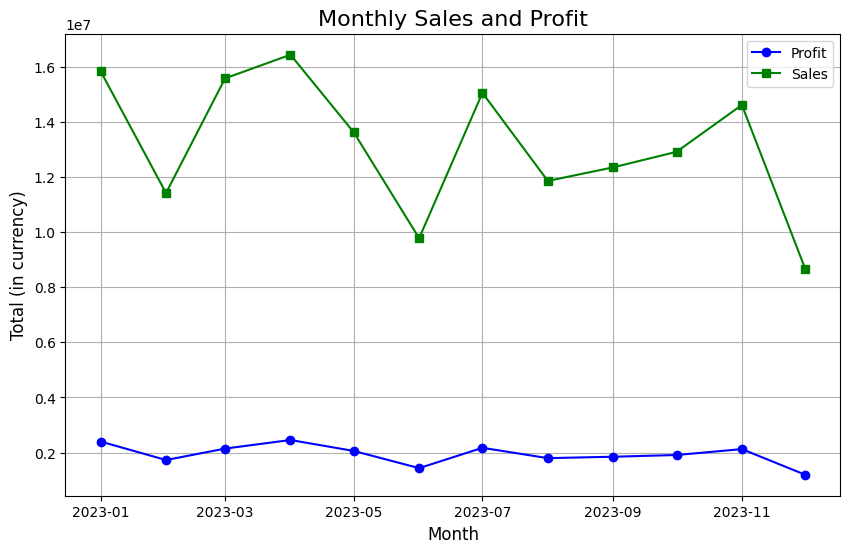

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'BillDate' is in the DataFrame and 'Amount' represents the sales
df['BillDate'] = pd.to_datetime(df['BillDate'], dayfirst=True)  # Ensure BillDate is datetime
df['Month'] = df['BillDate'].dt.to_period('M')   # Extract month and year

# Group by 'Month' and sum the 'Profit' and 'Amount' (sales)
monthly_profit = df.groupby('Month')['Profit'].sum()
monthly_sales = df.groupby('Month')['Amount'].sum()

# Convert the PeriodIndex to datetime for plotting
monthly_profit.index = monthly_profit.index.to_timestamp()
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plotting both profit and sales
plt.figure(figsize=(10, 6))

# Plot Profit
plt.plot(monthly_profit.index, monthly_profit, label='Profit', marker='o', color='b')

# Plot Sales
plt.plot(monthly_sales.index, monthly_sales, label='Sales', marker='s', color='g')

# Adding title and labels
plt.title('Monthly Sales and Profit', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total (in currency)', fontsize=12)

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


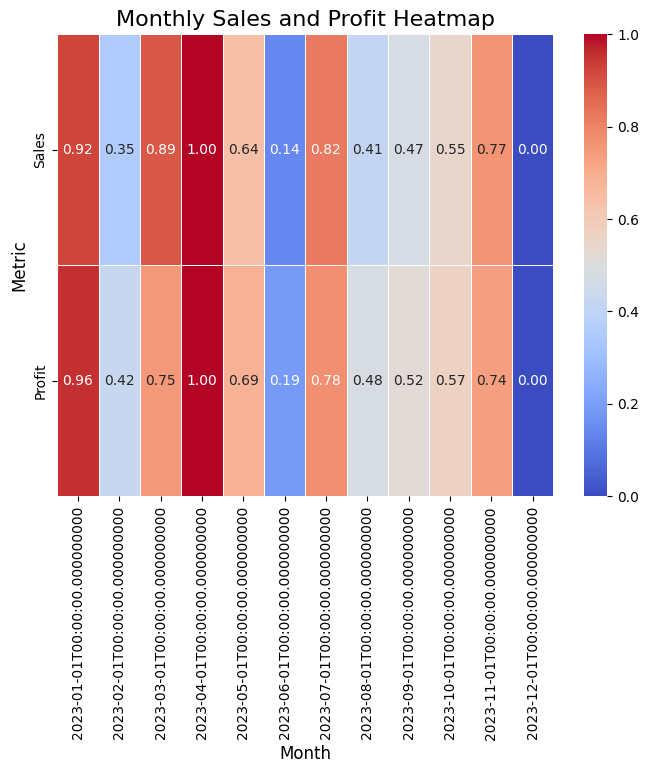

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for heatmap data
heatmap_data = pd.DataFrame({'Sales': monthly_sales, 'Profit': monthly_profit})

# Normalize the data for better visualization (optional)
heatmap_data_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data_normalized.T, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Adding title and labels
plt.title('Monthly Sales and Profit Heatmap', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Metric', fontsize=12)

plt.show()


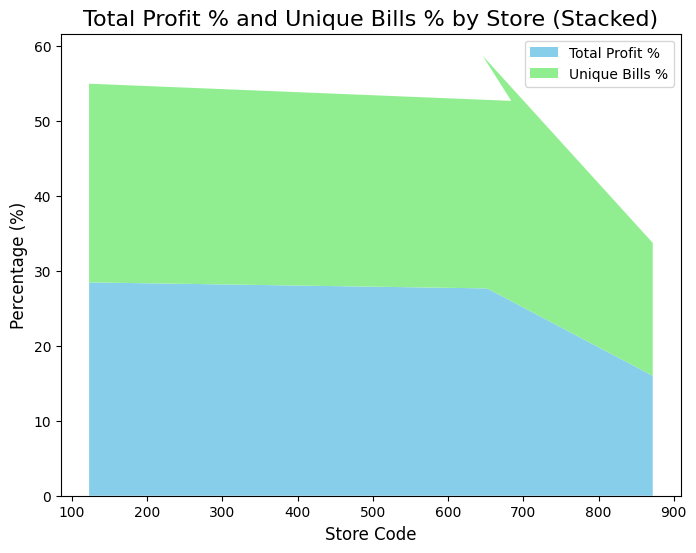

In [ ]:
import pandas as pd

# Creating the DataFrame from the provided data
data = {
    'Store Code': [872, 646, 684, 123],
    'Number of unique bills generated': [358, 620, 506, 535],
    'Total Profit Generated': [3717458.76, 6502556.88, 6417215.33, 6614199],
    'Total Profit %': ['15.99%', '27.97%', '27.60%', '28.45%'],
    'Unique Bills %': ['17.73%', '30.71%', '25.06%', '26.50%']
}

pdf = pd.DataFrame(data)
pdf['Total Profit %'] = pdf['Total Profit %'].str.rstrip('%').astype('float')
pdf['Unique Bills %'] = pdf['Unique Bills %'].str.rstrip('%').astype('float')

# Plotting
plt.figure(figsize=(8, 6))
plt.stackplot(pdf["Store Code"], pdf["Total Profit %"], pdf["Unique Bills %"], labels=['Total Profit %', 'Unique Bills %'], colors=['skyblue', 'lightgreen'])

# Adding labels and title
plt.xlabel('Store Code', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Total Profit % and Unique Bills % by Store (Stacked)', fontsize=16)

# Adding a legend
plt.legend()

plt.show()


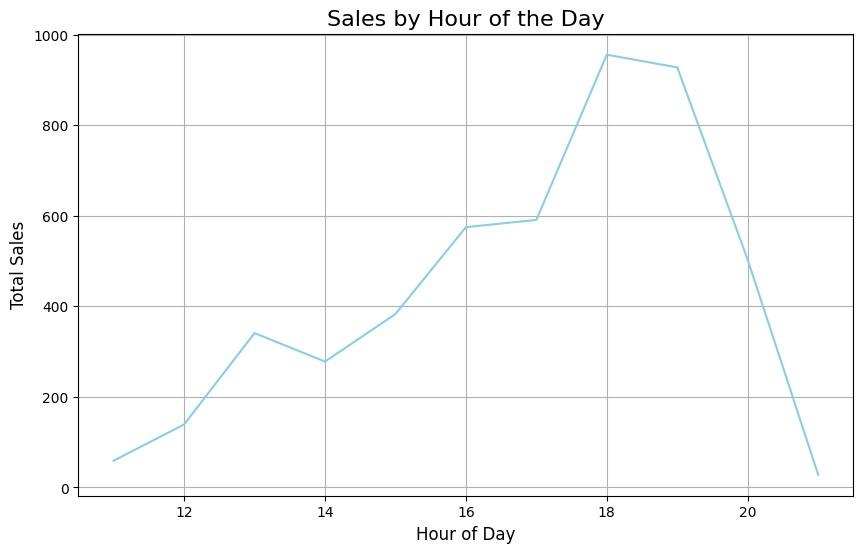

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the hour from 'BillTime'
df['Hour'] = pd.to_datetime(df['BillTime']).dt.hour

# Group by 'Hour' and sum the 'Amount' (sales)
hourly_sales = df.groupby('Hour')['Quantity'].sum()

# Plotting hourly sales
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', color='skyblue')

# Adding title and labels
plt.title('Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Display the plot
plt.xticks(rotation=0)  # Keep the hour labels horizontal
plt.grid(True)
plt.show()


<ipython-input-40-160be2b4c104>:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['TimeInterval'] = df['BillTime'].dt.floor('30T')  # Floor to nearest 20-minute interval
<ipython-input-40-160be2b4c104>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  interval_sales_hourly = interval_sales.resample('H').sum()


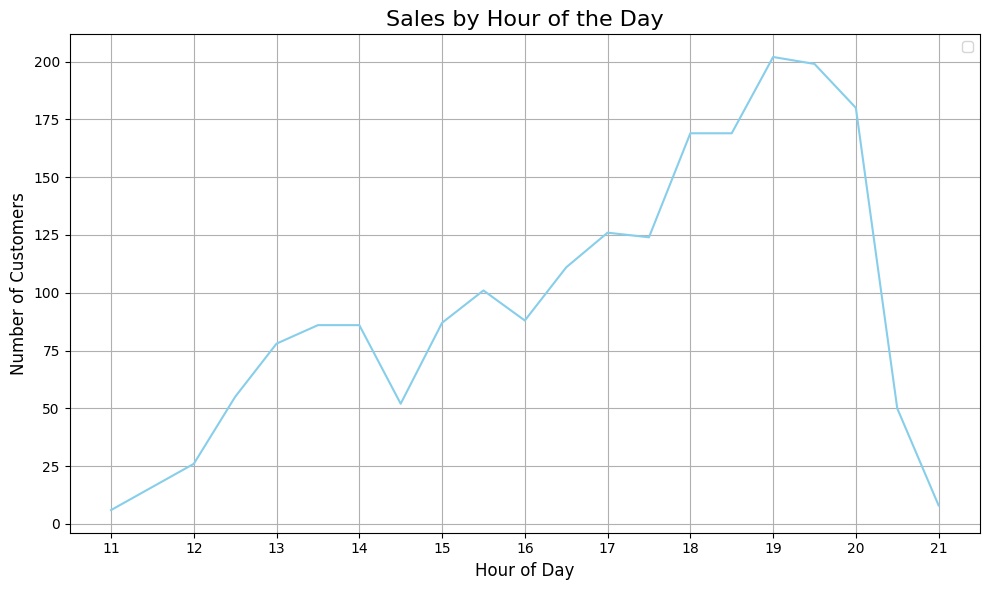

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'BillTime' is parsed as datetime
df['BillTime'] = pd.to_datetime(df['BillTime'])

# Create a 20-minute interval column
df['TimeInterval'] = df['BillTime'].dt.floor('30T')  # Floor to nearest 20-minute interval

# Group by the 20-minute interval and sum 'Quantity'
interval_sales = df.groupby('TimeInterval')['BillNumber'].nunique()

# Resample the data to an hourly resolution for the x-axis labeling
interval_sales_hourly = interval_sales.resample('H').sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(interval_sales.index, interval_sales, color='skyblue')

# Adjust x-axis to display only hour labels
plt.xticks(interval_sales_hourly.index, interval_sales_hourly.index.strftime('%H'), rotation=0)

# Adding title and labels
plt.title('Sales by Hour of the Day', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

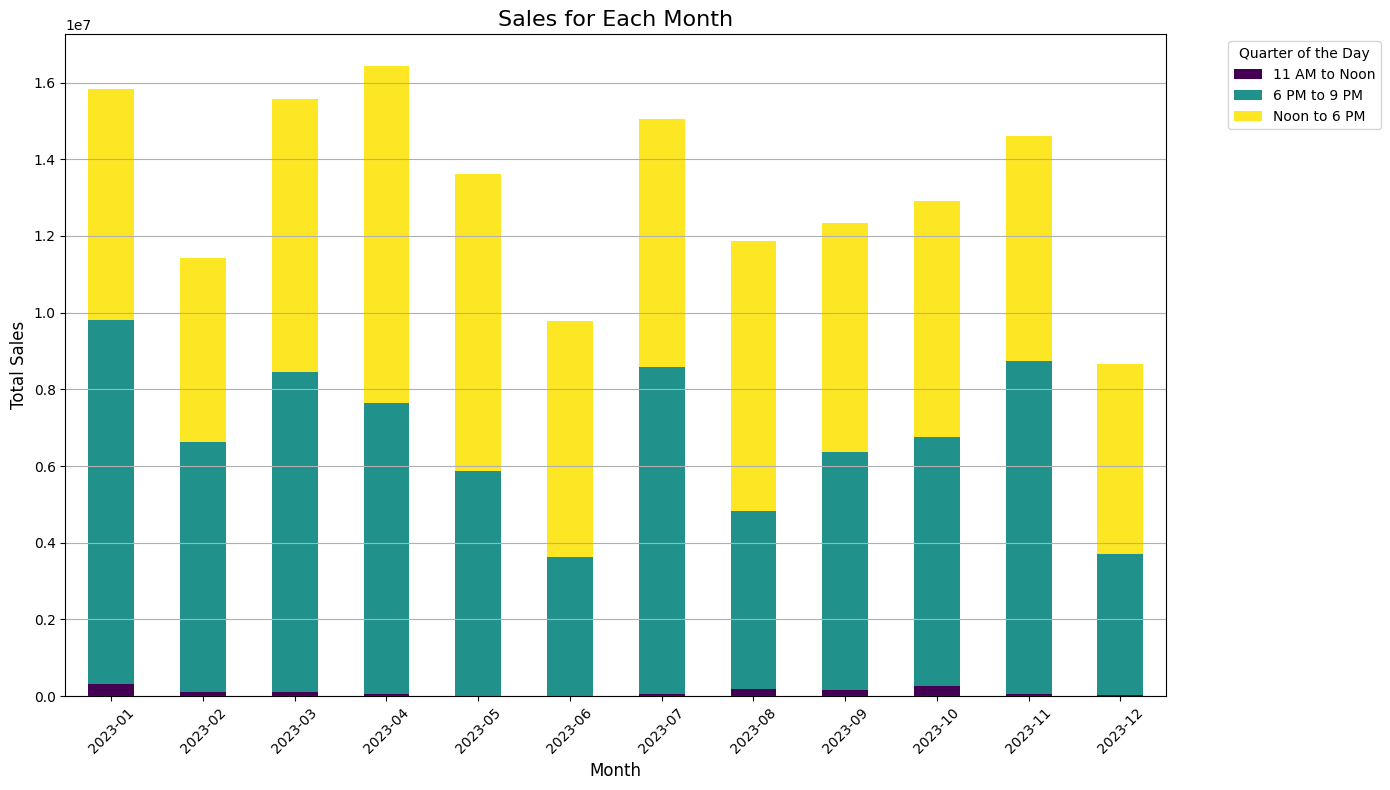

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'BillTime' to datetime format
df['BillTime'] = pd.to_datetime(df['BillTime'], format='%I:%M %p')  # Convert to datetime

# Extract hour from 'BillTime'
df['Hour'] = df['BillTime'].dt.hour  # Extract hour

# Define the quarter sections of the day
def get_quarter(hour):
    if 0 <= hour < 6:
        return 'Midnight to 6 AM'
    elif 11 <= hour < 12:
        return '11 AM to Noon'
    elif 12 <= hour < 18:
        return 'Noon to 6 PM'
    else:
        return '6 PM to 9 PM'

# Apply the function to create a new column 'Quarter'
df['Quarter'] = df['Hour'].apply(get_quarter)

# Extract month from 'BillDate'
df['Month'] = df['BillDate'].dt.to_period('M')  # Extract month

# Group by 'Month' and 'Quarter' to get total sales for each section
sales_by_quarter = df.groupby(['Month', 'Quarter'])['Amount'].sum().unstack()

# Plotting
plt.figure(figsize=(14, 8))

# Create a stacked bar graph
sales_by_quarter.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Adding title and labels
plt.title('Sales for Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Display the plot
plt.grid(axis='y')
plt.legend(title='Quarter of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()
